In [21]:
%matplotlib inline

from __future__ import print_function

import numpy
import matplotlib.pyplot as plt

Author: Tiago Correia

Final Project 

Columbia University APMA #4301

April 2018

### Goal

Implement finite difference methods to produce numerical approximations to the solution of the one-dimensional KdV equation 

$$u_t + 6uu_x + u_{xxx} = 0.$$

Four implicit schemes have been selected, as in Shahrill & Chong & Nor (2015).

#### First Order Upwind Scheme
(Sweby, 2000)

In [150]:
def KdV_UPW(delta_t, t_init, t_final, grid_points, U0, L):
    """ Solves the KdV equation numerically using an upwind 
    finite difference scheme with periodic boundary conditions.
    
    Args: 
        delta_t      (float):   time step 
        t_init       (float):   initial time
        t_final      (float):   final time 
        grid_points  (int):     number of gripoints including boundaries
        U0           (ndarray): initial condition
        L            (float):   length of numerical domain 
    
    Returns:
        U_xt         (ndarray): value of numerical solution to Kdv equation
                                at each time step."""   
    
    # Calculate the grid subdivision width and number of timesteps.
    delta_x = L / (grid_points - 1)
    num_tsteps = int((t_final - t_init) / delta_t)
    
    U_xt = numpy.empty([U0.shape[0], num_tsteps])
    U_xt[:,0] = U0
    
    print("UPWIND simulation parameters:")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\n"
           %(delta_x, delta_t, grid_points, num_tsteps))
    
    t = t_init
    i = 1
    
    # For each timestep we compute the finite difference approximation 
    # U_xt to the solution of the KdV equation.
    while t < t_final and i < num_tsteps:
    
        Ui = U_xt[:,i-1]
        
        # Impose periodic boundary conditions by 'wrapping' 
        # the solution vector around the length of the domain.
        Ui_p1 = numpy.roll(U_xt[:,i-1], -1)
        Ui_p2 = numpy.roll(U_xt[:,i-1], -2)
        Ui_m1 = numpy.roll(U_xt[:,i-1], 1)
        Ui_m2 = numpy.roll(U_xt[:,i-1], 2)

        U_xt[:,i] = Ui - 6 * delta_t / (delta_x) * Ui \
                    * (Ui - Ui_m1) - delta_t / (2 * delta_x**3) \
                     * (Ui_p2 - Ui_m2 - 2.0 * (Ui_p1 - Ui_m1))
        
        t += delta_t
        i += 1
        
    return U_xt

#### Zabusky and Kruskal Scheme
(Taha & Ablowitz, 1984; Zabusky & Kruskal, 1965)

In [151]:
def KdV_ZK(delta_t, t_init, t_final, grid_points, U0, L):
    """ Solves the KdV equation numerically using a Zabusky-Kruskal 
    finite difference scheme with periodic boundary conditions.
    
    Args: 
        delta_t      (float):   time step 
        t_init       (float):   initial time
        t_final      (float):   final time 
        grid_points  (int):     number of gripoints including boundaries
        U0           (ndarray): initial condition
        L            (float):   length of numerical domain 
    
    Returns:
        U_xt         (ndarray): value of numerical solution to Kdv equation
                                at each time step."""    

    # Calculate the grid subdivision width and number of timesteps.
    delta_x = L / (grid_points - 1)
    num_tsteps = int((t_final - t_init) / delta_t)
    
    U_xt = numpy.empty([U0.shape[0], num_tsteps])
    U_xt[:,0] = U0
    
    print("ZABUSKY-KRUSKAL simulation parameters:")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\n"
           %(delta_x, delta_t, grid_points, num_tsteps))
        
    # Since the ZK scheme requires the two previous evaluations, we calculate
    # the first time step using Forward Euler. 

    U0_p1 = numpy.roll(U_xt[:,0], -1)
    U0_p2 = numpy.roll(U_xt[:,0], -2)
    U0_m1 = numpy.roll(U_xt[:,0], 1)
    U0_m2 = numpy.roll(U_xt[:,0], 2)

    U_xt[:,1] = U0 - delta_t / (delta_x) * (U0_p1 + U0 + U0_m1) * \
                 (U0_p1 - U0_m1) - delta_t / (2 * delta_x**3) * \
                  (U0_p2 - U0_m2 - 2.0 * (U0_p1 - U0_m1))
    
    t = t_init
    i = 2
    
    # For each timestep we compute the finite difference approximation 
    # U_xt to the solution of the KdV equation.
    while t < t_final and i < num_tsteps:
    
        Ui = U_xt[:,i-1]
        
        # Impose periodic boundary conditions by 'wrapping' 
        # the solution vector around the length of the domain.
        Ui_p1 = numpy.roll(U_xt[:,i-1], -1)
        Ui_p2 = numpy.roll(U_xt[:,i-1], -2)
        Ui_m1 = numpy.roll(U_xt[:,i-1], 1)
        Ui_m2 = numpy.roll(U_xt[:,i-1], 2)

        U_xt[:,i] = U_xt[:,i-2] - 2 * delta_t / (delta_x) * (Ui_p1 + Ui + Ui_m1) \
                     * (Ui_p1 - Ui_m1) - delta_t / (delta_x**3) \
                      * (Ui_p2 - Ui_m2 - 2.0 * (Ui_p1 - Ui_m1))

        t += delta_t
        i += 1
        
    return U_xt

#### Lax-Wendroff Scheme
(Sweby, 2000)

In [152]:
def KdV_LW(delta_t, t_init, t_final, grid_points, U0, L):
    """ Solves the KdV equation numerically using a Lax-Wendroff 
    finite difference scheme with periodic boundary conditions.
    
    Args: 
        delta_t      (float):   time step 
        t_init       (float):   initial time
        t_final      (float):   final time 
        grid_points  (int):     number of gripoints including boundaries
        U0           (ndarray): initial condition
        L            (float):   length of numerical domain 
    
    Returns:
        U_xt         (ndarray): value of numerical solution to Kdv equation
                                at each time step."""
    
    # Calculate the grid subdivision width and number of timesteps.
    delta_x = L / (grid_points - 1)
    num_tsteps = int((t_final - t_init) / delta_t)
    
    U_xt = numpy.empty([U0.shape[0], num_tsteps])
    U_xt[:,0] = U0
    
    print("LAX-WENDROFF simulation parameters:")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\n"
           %(delta_x, delta_t, grid_points, num_tsteps))  

    t = t_init
    i = 1
    
    # For each timestep we compute the finite difference approximation 
    # U_xt to the solution of the KdV equation.
    while t < t_final and i < num_tsteps:
    
        Ui = U_xt[:,i-1]
        
        # Impose periodic boundary conditions by 'wrapping' 
        # the solution vector around the length of the domain.
        Ui_p1 = numpy.roll(U_xt[:,i-1], -1)
        Ui_p2 = numpy.roll(U_xt[:,i-1], -2)
        Ui_m1 = numpy.roll(U_xt[:,i-1], 1)
        Ui_m2 = numpy.roll(U_xt[:,i-1], 2)

        U_xt[:,i] = Ui - 3 * (delta_t / delta_x) * Ui * ((Ui_p1 - Ui_m1) - \
                     3 * (delta_t / delta_x) * (Ui_p1**2 + Ui_m1**2))\
                      - delta_t / (2 * delta_x**3) * (Ui_p2 - Ui_m2 - 2.0 * (Ui_p1 - Ui_m1))

        t += delta_t
        i += 1
        
    return U_xt

#### Walkley Scheme
(Walkley, 1999)

In [153]:
def KdV_WA(delta_t, t_init, t_final, grid_points, U0, L):
    """ Solves the KdV equation numerically using the Walkley
    finite difference scheme with periodic boundary conditions.
    
    Args: 
        delta_t      (float):   time step 
        t_init       (float):   initial time
        t_final      (float):   final time 
        grid_points  (int):     number of gripoints including boundaries
        U0           (ndarray): initial condition
        L            (float):   length of numerical domain 
    
    Returns:
        U_xt         (ndarray): value of numerical solution to Kdv equation
                                at each time step."""
    
    # Calculate the grid subdivision width and number of timesteps.
    delta_x = L / (grid_points - 1)
    num_tsteps = int((t_final - t_init) / delta_t)
    
    U_xt = numpy.empty([U0.shape[0], num_tsteps])
    U_xt[:,0] = U0
    
    print("WALKLEY simulation parameters:\n")
    print("Delta x: %s\nDelta t: %s\nGridpoints: %s\nTimesteps: %s\n"
           %(delta_x, delta_t, grid_points, num_tsteps)) 

    t = t_init
    i = 1
    
    # For each timestep we compute the finite difference approximation 
    # U_xt to the solution of the KdV equation.
    while t < t_final and i < num_tsteps:
    
        Ui = U_xt[:,i-1]
        
        # Impose periodic boundary conditions by 'wrapping' 
        # the solution vector around the length of the domain.
        Ui_p1 = numpy.roll(U_xt[:,i-1], -1)
        Ui_p2 = numpy.roll(U_xt[:,i-1], -2)
        Ui_m1 = numpy.roll(U_xt[:,i-1], 1)
        Ui_m2 = numpy.roll(U_xt[:,i-1], 2)

        U_xt[:,i] = Ui - 0.25 * (delta_t / delta_x) * (Ui_m2**2 - 8 * Ui_m1**2 \
                     + 8 * Ui_p1**2 - Ui_p2**2) - delta_t / (2 * delta_x**3) \
                      * (Ui_p2 - Ui_m2 - 2.0 * (Ui_p1 - Ui_m1))

        t += delta_t
        i += 1
        
    return U_xt

Initialize the relevant parameters.

In [257]:
# True solution: a solitary wave (aka soliton) with positive speed.
u_true = lambda x, t, c: 0.5 * c *  \
                         (1 / numpy.cosh((numpy.sqrt(c)/2) * (x - c*t)))**2

# Length of the domain.
L = 20  

# Speed of propagation.
c = 3 

# Number of gridpoints including boundaries.
grid_points = 101   

# Initial and final times of simulation.
t_init = 0
t_final = 1

# Initialize the spatial domain.
x = numpy.linspace(-L/4, 3*L/4, grid_points)

# Spatial and time resolutions.
delta_x = L / (grid_points-1)
delta_t = 0.000004

# Number of timesteps used in scheme.
num_tsteps = int((t_final - t_init) / delta_t)

In [258]:
# Initial condition.
U0 = u_true(x, t_init, c)


Let's run all four schemes using the parameters above, which include an initial condition of a single soliton propagating to the right.

In [259]:
U_xt_UPW = KdV_UPW(delta_t, t_init, t_final, grid_points, U0, L)
U_xt_ZK  = KdV_ZK(delta_t, t_init, t_final, grid_points, U0, L)
U_xt_LW  = KdV_LW(delta_t, t_init, t_final, grid_points, U0, L)
U_xt_WA  = KdV_WA(delta_t, t_init, t_final, grid_points, U0, L)

UPWIND simulation parameters:
Delta x: 0.2
Delta t: 4e-06
Gridpoints: 101
Timesteps: 250000

ZABUSKY-KRUSKAL simulation parameters:
Delta x: 0.2
Delta t: 4e-06
Gridpoints: 101
Timesteps: 250000

LAX-WENDROFF simulation parameters:
Delta x: 0.2
Delta t: 4e-06
Gridpoints: 101
Timesteps: 250000

WALKLEY simulation parameters:

Delta x: 0.2
Delta t: 4e-06
Gridpoints: 101
Timesteps: 250000



Given the solution array, we want to be able to plot the time evolution of our numerical approximation to $u(x,t)$. The function below allows us to do exactly that. 

In [260]:
def plot_sol(delta_t, t_init, t_final, U_xt, num_plots, title, u_true = False): 
    """ Produces *num_plots* plots of a given numerical solution
    to the KdV equation. These are equidistant in time and include
    both the initial condition and the last time step.
    
    Args: 
        delta_t        (float):    time step 
        t_init         (float):    initial time
        t_final        (float):    final time 
        U_xt           (ndarray):  value of numerical solution to Kdv equation
                                   at each time step
        num_plots      (int):      number of time steps we wish to plot
        title          (str):      plot title
        u_true(x,t,c)  (function): (optional) true solution of KdV equation
    
    Returns:
        none
    """
    
    num_tsteps = int((t_final - t_init) / delta_t)
    
    # Select time steps to display given num_tsteps and num_plots.
    output_times = (numpy.linspace(1, num_plots - 1, num_plots - 1) \
                    / (num_plots - 1)) * num_tsteps - 1
    
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(x, U_xt[:,0],'b', label="Initial condition")
    for (n, tn) in enumerate(output_times):
        axes.plot(x, U_xt[:,int(tn)], "-", label="U_xt at t = %s" 
                  %round((t_init + tn*delta_t),2))
        
    # Check whether user has provided the analytic solution at t = t_final,
    # and if so, plot it.
    if u_true != False:
        axes.plot(x, u_true(x, t_final, c),'r--', label="u_true at t = %s" %t_final)
        
    axes.set_title(title)
    axes.set_xlabel("$x$")
    axes.set_ylabel("$u$")
    
    
    # Optional: shrink current axis
    #box = axes.get_position()
    #axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Save as a pdf (reducing the whitespace around the plot).
    #plt.savefig(title + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

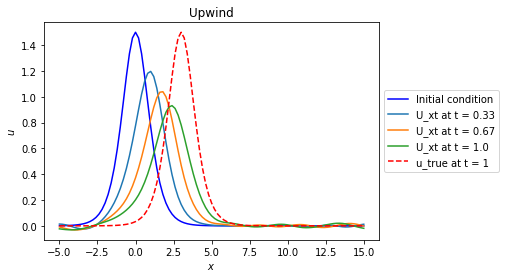

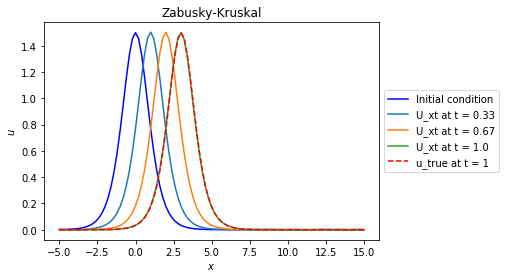

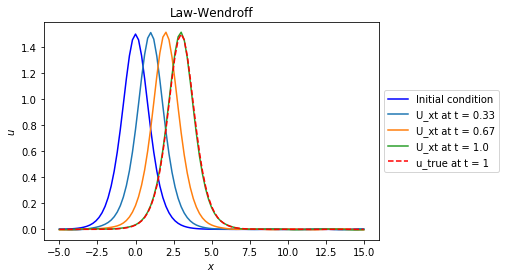

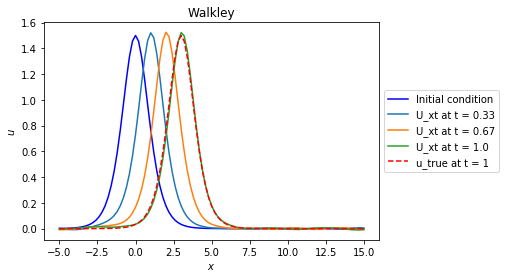

In [262]:
plot_sol(delta_t, t_init, t_final, U_xt_UPW, 4, "Upwind", u_true)
plot_sol(delta_t, t_init, t_final, U_xt_ZK, 4, "Zabusky-Kruskal", u_true)
plot_sol(delta_t, t_init, t_final, U_xt_LW, 4, "Lax-Wendroff", u_true)
plot_sol(delta_t, t_init, t_final, U_xt_WA, 4, "Walkley", u_true)

The KdV equation has infinitely many integrals of motion, the lowest order of which corresponds to a statement of conservation of mass. To test how well our numerical solutions conserve this quantity, we integrate them at each time step and observe how that value changes as the scheme runs...

In [263]:
def integrate_sol(U_xt, x):
    """ Integrates the numerical solution at each timestep using 
    the composite trapezoidal rule.
    
    Args:  
        U       (ndarray):   (grid_points, num_tsteps) solution vector 
        x       (array):     
    
    Returns:
        U_xt    (ndarray):   value of numerical solution to Kdv equation
                             at each time step.
    """
    
    # Extract information about the simulation parameters.
    (grid_points, num_tsteps) = U_xt.shape
    
    if(grid_points != len(x)):
        raise ValueError('Invalid input dimensions.')
        
    delta_x = 1 / (grid_points - 1)
    U_intg = numpy.empty([num_tsteps, 1])
    
    print("Integrating solution with %s gridpoints and %s time steps..."
          %(grid_points, num_tsteps))
    
    for i in range(num_tsteps):
        
        # Integrate U at each timestep using the composite trapezoidal rule.
        U_intg[i] = numpy.trapz(U_xt[:,i], x)
        
    return U_intg

In [264]:
U_intg_UPW = integrate_sol(U_xt_UPW, x)
U_intg_ZK = integrate_sol(U_xt_ZK, x)
U_intg_LW = integrate_sol(U_xt_LW, x)
U_intg_WA = integrate_sol(U_xt_WA, x)

Integrating solution with 101 gridpoints and 250000 time steps...
Integrating solution with 101 gridpoints and 250000 time steps...
Integrating solution with 101 gridpoints and 250000 time steps...
Integrating solution with 101 gridpoints and 250000 time steps...


...and plot the results.

In [265]:
def plot_intg(t, U_intg, title):
    """ Produces a plot of U_intg as a function of t.
    
    Args: 
        t          (array):   dependent variable  
        U_intg     (ndarray): function we wish to plot
    
    Returns:
        none
    """
    if(len(t) != len(U_intg)):
        raise ValueError('Invalid input dimensions.')
        
    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(t, U_intg)
    axes.set_title(title)
    axes.set_ylabel('Mass')
    axes.set_xlabel('Time (s)')
    
    box = axes.get_position()
    axes.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Uncomment to save images as pdf files
    #plt.savefig(title + '_mass' + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

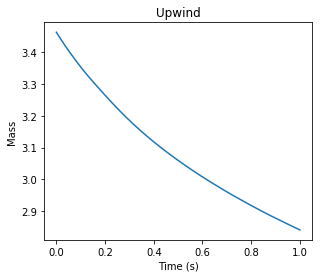

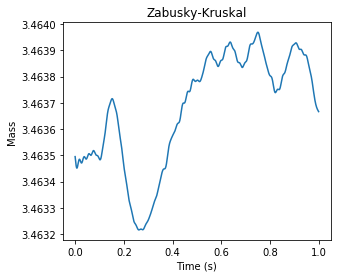

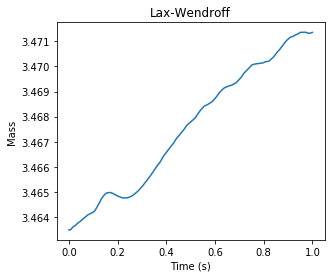

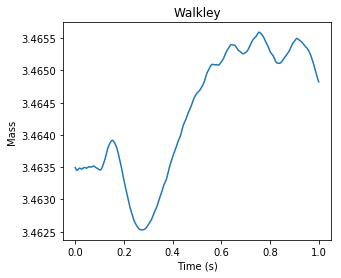

In [266]:
t = numpy.linspace(t_init, t_final, num_tsteps)

plot_intg(t, U_intg_UPW, "Upwind")
plot_intg(t, U_intg_ZK, "Zabusky-Kruskal")
plot_intg(t, U_intg_LW, "Lax-Wendroff")
plot_intg(t, U_intg_WA, "Walkley")

We might want to test different initial conditions. For example, what if we start with two solitons where the one in front is moving slower?

In [249]:
U0 = u_true(x, t_init-0.5, 1.2*c) + u_true(x, t_init + 3, c/2)

In [ ]:
U_xt_UPW = KdV_UPW(delta_t, t_init, t_final, grid_points, U0, L)
U_xt_ZK  = KdV_ZK(delta_t, t_init, t_final, grid_points, U0, L)
U_xt_LW  = KdV_LW(delta_t, t_init, t_final, grid_points, U0, L)
U_xt_WA  = KdV_WA(delta_t, t_init, t_final, grid_points, U0, L)

And we plot the solutions as before.

In [ ]:
plot_sol(delta_t, t_init, t_final, U_xt_UPW, 4, "Upwind")
plot_sol(delta_t, t_init, t_final, U_xt_ZK, 4, "Zabusky-Kruskal")
plot_sol(delta_t, t_init, t_final, U_xt_LW, 4, "Lax-Wendroff")
plot_sol(delta_t, t_init, t_final, U_xt_WA, 4, "Walkley")

In order to better observe how the two solitons interacted with each other, we produce 2D heatmaps showcasing the height of the wave at each given coordinate in space-time.  

In [250]:
def plot_imshow(t_init, t_final, U, L, title):
    """ Produces a heatmap of U as a function of space and time. 
    
    Args: 
        t_init         (float):    initial time
        t_final        (float):    final time 
        U              (ndarray):  function we wish to plot
        L              (float):    length of the domain
        title          (str):      title of the plot
    
    Returns:
        none
    """
        
    U_plot = U.transpose()

    fig = plt.figure()
    axes = fig.add_subplot(1, 1, 1)
    axes.imshow(U_plot[::-10,:],extent=[-L/2, 3*L/4,t_init,t_final],cmap='viridis')
    axes.set_xlabel('Position')
    axes.set_ylabel('Time')
    axes.set_title(title)
    axes.set_aspect('auto')
    
    plt.savefig(title + 'heat_map' + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

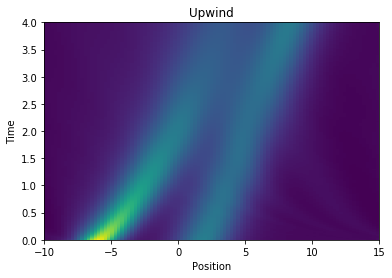

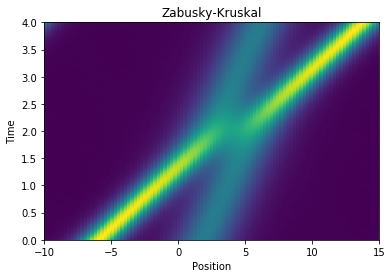

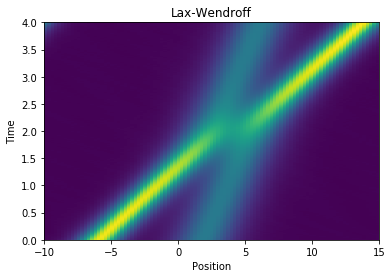

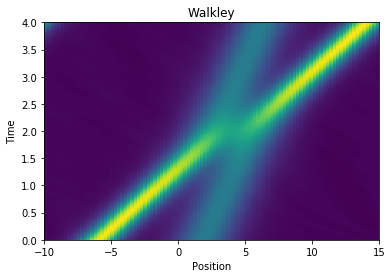

In [251]:
plot_imshow(t_init, t_final, U_xt_UPW, L, "Upwind")
plot_imshow(t_init, t_final, U_xt_ZK, L, "Zabusky-Kruskal")
plot_imshow(t_init, t_final, U_xt_LW, L, "Lax-Wendroff")
plot_imshow(t_init, t_final, U_xt_WA, L, "Walkley")